<a href="https://colab.research.google.com/github/KrysnaRachmatR/PCVK_GANJIL_2023/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MORPHOLOGY CITRA (Dilasi, Erosi, Operasi Opening, Operasi Closing, Top Hat, Black Hat)

### NAMA  : Krysna Rachmat Ramadhan Budiono
### NIM   : 2141720219
### ABSEN : 14

## PRAKTIKUM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

In [ ]:
# Function Dilasi

def dilasi_citra(F, w):
  height, width = F.shape

  image_dilasi = np.zeros((height, width), dtype=np.uint8)

  # generate structure element
  structure_element = np.ones((w,w), dtype=np.uint8)
  constant = (w - 1) // 2

  # melakukan proses dilasi
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structure_element
      image_dilasi[i,j]= np.max(product)

  return image_dilasi

(-0.5, 286.5, 109.5, -0.5)

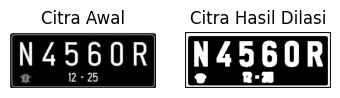

In [ ]:
# Penampilan Citra Dilasi tanpa library morphology

image_dilasi_a = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg',0)

w = 5
ret, thresh = cv2.threshold(image_dilasi_a , 125, 200, cv2.THRESH_BINARY)
dilasi = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(image_dilasi_a, cmap = 'gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132),plt.imshow(dilasi, cmap = 'gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

Structuring Element Dilasi (SED) berbentuk cross 3 x 3  menggunakan library morphology dari openCV

[[1 1 1]
 [1 1 1]
 [1 1 1]]


(-0.5, 286.5, 109.5, -0.5)

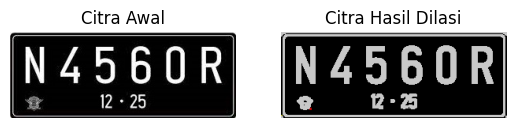

In [ ]:
# Penampilan Citra Dilasi dengan library morphology

image_dilasi_b = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg')

ret, thresh = cv2.threshold(image_dilasi_b , 125, 200, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image_dilasi_b)
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122), plt.imshow(dilasi)
plt.title('Citra Hasil Dilasi')
plt.axis('off')


 Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology

In [ ]:
def erosi_citra(F, w):
    height, width, channels = F.shape

    image_erosi = np.zeros((height, width, channels), dtype=np.uint8)

    # generate structure element (square 5x5 for each channel)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # melakukan proses erosi untuk setiap saluran warna
    for c in range(channels):
        for i in range(constant, height - constant):
            for j in range(constant, width - constant):
                temp = F[i-constant:i+constant+1, j-constant:j+constant+1, c]

                # melakukan operasi erosi dengan mengambil nilai minimum
                eroded_value = np.min(temp * structure_element)

                image_erosi[i, j, c] = eroded_value

    return image_erosi

(-0.5, 286.5, 109.5, -0.5)

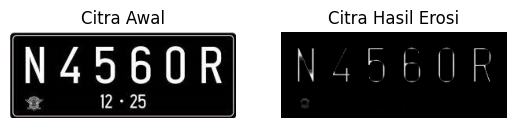

In [ ]:
# Penampilan Citra Erosi dengan library morphology

# Membaca gambar dalam mode keabuan
image_erosi_a = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg')

# Menentukan ukuran kernel
w = 5

# Melakukan erosi
hasil_erosi = erosi_citra(image_erosi_a, w)

# Menampilkan gambar asli dan hasil erosi
plt.subplot(121), plt.imshow(image_erosi_a)
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122), plt.imshow(hasil_erosi)
plt.title('Citra Hasil Erosi')
plt.axis('off')

 Structuring Element
Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


(-0.5, 286.5, 109.5, -0.5)

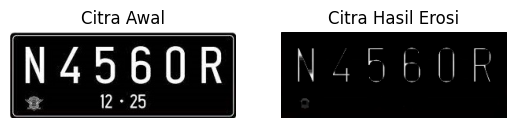

In [ ]:
# Penampilan Citra Erosi dengan library morphology

image_erosi_b = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg')

kernel = np.ones((5,5), np.uint16)
erosi = cv2.erode(image_erosi_b, kernel, iterations = 1)
print(kernel)

plt.subplot(121), plt.imshow(image_erosi_b)
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122), plt.imshow(erosi)
plt.title('Citra Hasil Erosi')
plt.axis('off')

Operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology

In [ ]:
# Fungsi erosi untuk citra biner
def erosi_citra_opening(F, w):
    height, width = F.shape

    image_erosi = np.zeros((height, width), dtype=np.uint8)

    # generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # melakukan proses erosi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]

            # melakukan operasi erosi dengan mengambil nilai minimum
            eroded_value = np.min(temp * structure_element)

            image_erosi[i, j] = eroded_value

    return image_erosi

# Fungsi dilasi untuk citra biner
def dilasi_citra_opening(F, w):
    height, width = F.shape

    image_dilasi = np.zeros((height, width), dtype=np.uint8)

    # generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # melakukan proses dilasi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]

            # melakukan operasi dilasi dengan mengambil nilai maksimum
            dilated_value = np.max(temp * structure_element)

            image_dilasi[i, j] = dilated_value

    return image_dilasi


# Fungsi opening untuk citra biner
def opening_citra(F, w):
    # Melakukan erosi terlebih dahulu
    eroded_image = erosi_citra_opening(F, w)

    # Menggunakan hasil erosi untuk dilasi
    dilated_image = dilasi_citra_opening(eroded_image, w)

    return dilated_image


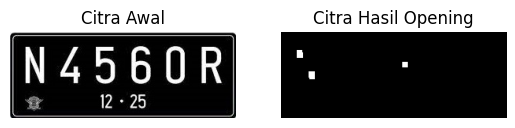

In [ ]:
# Penampilan Citra Opening tanpa library morphology

# Membaca gambar
image_opening_a = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg')

# Merubah citra awal ke citra keabuan
gray_image = cv2.cvtColor(image_opening_a, cv2.COLOR_BGR2GRAY)


# Melakukan thresholding untuk menghasilkan citra biner
_, binary_image = cv2.threshold(gray_image, 125, 255, cv2.THRESH_BINARY)

# Menentukan ukuran kernel
w = 7

# Melakukan opening pada citra biner
result_opening = opening_citra(binary_image, w)

# Menampilkan gambar asli, hasil erosi, dan hasil opening
plt.subplot(121), plt.imshow(cv2.cvtColor(image_opening_a, cv2.COLOR_BGR2RGB))
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122), plt.imshow(result_opening, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.show()



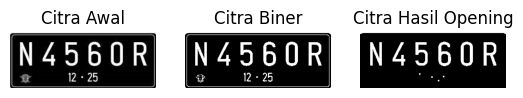

In [ ]:
# Penampilan Citra Opening dengan library morphology
# Membaca gambar
image_opening_b = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg')

# Merubah citra awal ke citra keabuan
gray_image = cv2.cvtColor(image_opening_b, cv2.COLOR_BGR2GRAY)

# Melakukan thresholding untuk menghasilkan citra biner
_, binary_image = cv2.threshold(gray_image, 125, 255, cv2.THRESH_BINARY)

# Menentukan kernel untuk operasi morfologi
kernel = np.ones((3, 3), np.uint8)

# Melakukan opening dengan library morphology dari OpenCV
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Menampilkan gambar asli, citra biner, dan hasil opening
plt.subplot(131), plt.imshow(cv2.cvtColor(image_opening_b, cv2.COLOR_BGR2RGB))
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132), plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(133), plt.imshow(opening, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.show()


Operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology

In [ ]:

# Fungsi dilasi untuk citra biner
def dilasi_citra_closing(F, w):
    height, width = F.shape

    image_dilasi = np.zeros((height, width), dtype=np.uint8)

    # generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # melakukan proses dilasi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]

            # melakukan operasi dilasi dengan mengambil nilai maksimum
            dilated_value = np.max(temp * structure_element)

            image_dilasi[i, j] = dilated_value

    return image_dilasi

# Fungsi erosi untuk citra biner
def erosi_citra_closing(F, w):
    height, width = F.shape

    image_erosi = np.zeros((height, width), dtype=np.uint8)

    # generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # melakukan proses erosi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]

            # melakukan operasi erosi dengan mengambil nilai minimum
            eroded_value = np.min(temp * structure_element)

            image_erosi[i, j] = eroded_value

    return image_erosi


# Fungsi opening untuk citra biner
def closing_citra(F, w):
    # Melakukan erosi terlebih dahulu
    dilasi_image = dilasi_citra_closing(F, w)

    # Menggunakan hasil erosi untuk dilasi
    erosi_image = erosi_citra_opening(dilasi_image, w)

    return erosi_image


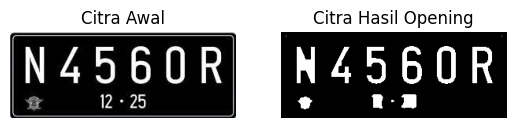

In [ ]:
# Penampilan Citra Closing tanpa library morphology

# Membaca gambar
image_closing_a = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg')

# Merubah citra awal ke citra keabuan
gray_image = cv2.cvtColor(image_closing_a, cv2.COLOR_BGR2GRAY)


# Melakukan thresholding untuk menghasilkan citra biner
_, binary_image = cv2.threshold(gray_image, 125, 255, cv2.THRESH_BINARY)

# Menentukan ukuran kernel
w = 7

# Melakukan opening pada citra biner
result_closing = closing_citra(binary_image, w)

# Menampilkan gambar asli, hasil erosi, dan hasil opening
plt.subplot(121), plt.imshow(cv2.cvtColor(image_closing_a, cv2.COLOR_BGR2RGB))
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122), plt.imshow(result_closing, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.show()



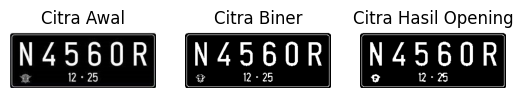

In [ ]:
# Penampilan Citra Closing dengan library morphology

# Membaca gambar
image_closing_b = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg')

# Merubah citra awal ke citra keabuan
gray_image = cv2.cvtColor(image_closing_b, cv2.COLOR_BGR2GRAY)

# Melakukan thresholding untuk menghasilkan citra biner
_, binary_image = cv2.threshold(gray_image, 125, 255, cv2.THRESH_BINARY)

# Menentukan kernel untuk operasi morfologi
kernel = np.ones((3, 3), np.uint8)

# Melakukan opening dengan library morphology dari OpenCV
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Menampilkan gambar asli, citra biner, dan hasil opening
plt.subplot(131), plt.imshow(cv2.cvtColor(image_closing_b, cv2.COLOR_BGR2RGB))
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132), plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(133), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.show()


operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5

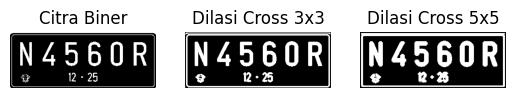

In [ ]:
# Dilasi Cross 3 x 3 dan 5 x5

# Membaca gambar
image_cross = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan thresholding untuk menghasilkan citra biner
_, binary_image = cv2.threshold(image_cross, 125, 255, cv2.THRESH_BINARY)

# Fungsi untuk melakukan dilasi dengan Structuring Element berbentuk Cross
def dilasi_cross(image_cross, size):
    height, width = image_cross.shape
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Membuat Structuring Element berbentuk Cross
    structure_element = np.zeros((size, size), dtype=np.uint8)
    center = size // 2
    structure_element[:, center] = 1
    structure_element[center, :] = 1

    # Melakukan dilasi
    for i in range(center, height - center):
        for j in range(center, width - center):
            temp = image_cross[i - center:i + center + 1, j - center:j + center + 1]
            dilated_image[i, j] = np.max(temp * structure_element)

    return dilated_image

# Melakukan dilasi dengan Structuring Element berbentuk Cross 3x3
dilasi_image_cross_3x3 = dilasi_cross(binary_image, 3)

# Melakukan dilasi dengan Structuring Element berbentuk Cross 5x5
dilasi_image_cross_5x5 = dilasi_cross(binary_image, 5)

# Menampilkan hasil dilasi
plt.subplot(131), plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(132), plt.imshow(dilasi_image_cross_3x3, cmap='gray')
plt.title('Dilasi Cross 3x3')
plt.axis('off')

plt.subplot(133), plt.imshow(dilasi_image_cross_5x5, cmap='gray')
plt.title('Dilasi Cross 5x5')
plt.axis('off')

plt.show()


Operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5

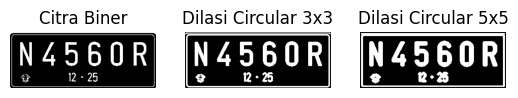

In [ ]:
# Dilasi Circular 3 x 3 dan 5 x 5

# Membaca gambar
image_circular = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan thresholding untuk menghasilkan citra biner
_, binary_image = cv2.threshold(image_circular, 125, 255, cv2.THRESH_BINARY)

# Fungsi untuk membuat Structuring Element berbentuk Circular
def create_circular(size):
    se = np.zeros((size, size), dtype=np.uint8)
    center = size // 2

    for i in range(size):
        for j in range(size):
            if (i - center) ** 2 + (j - center) ** 2 <= center ** 2:
                se[i, j] = 1

    return se

# Fungsi untuk melakukan dilasi dengan Structuring Element berbentuk Circular
def dilasi_circular(image_circular, size):
    height, width = image_circular.shape
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Membuat Structuring Element berbentuk Circular
    structure_element = create_circular(size)

    # Melakukan dilasi
    for i in range(size // 2, height - size // 2):
        for j in range(size // 2, width - size // 2):
            temp = image_circular[i - size // 2:i + size // 2 + 1, j - size // 2:j + size // 2 + 1]
            dilated_image[i, j] = np.max(temp * structure_element)

    return dilated_image

# Melakukan dilasi dengan Structuring Element berbentuk Circular 3x3
dilasi_image_circular_3x3 = dilasi_circular(binary_image, 3)

# Melakukan dilasi dengan Structuring Element berbentuk Circular 5x5
dilasi_image_circular_5x5 = dilasi_circular(binary_image, 5)

# Menampilkan hasil dilasi
plt.subplot(131), plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(132), plt.imshow(dilasi_image_circular_3x3, cmap='gray')
plt.title('Dilasi Circular 3x3')
plt.axis('off')

plt.subplot(133), plt.imshow(dilasi_image_circular_5x5, cmap='gray')
plt.title('Dilasi Circular 5x5')
plt.axis('off')

plt.show()


Operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7

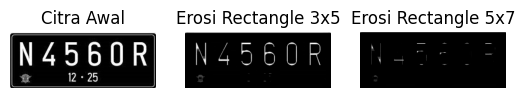

In [ ]:
# Erosi Structuring Element 3 x 5 dan 5 x 7

# Membaca gambar
image_erosi_structuring_element = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Fungsi untuk melakukan erosi dengan Structuring Element berbentuk Rectangle
def erosi_rectangle(image_erosi_structuring_element, height, width):
    eroded_image = cv2.erode(image_erosi_structuring_element, np.ones((height, width), np.uint8), iterations=1)
    return eroded_image

# Melakukan erosi dengan Structuring Element berbentuk Rectangle 3x5
erosi_image_rectangle_3x5 = erosi_rectangle(image_erosi_structuring_element, 3, 5)

# Melakukan erosi dengan Structuring Element berbentuk Rectangle 5x7
erosi_image_rectangle_5x7 = erosi_rectangle(image_erosi_structuring_element, 5, 7)

# Menampilkan hasil erosi
plt.subplot(131), plt.imshow(image_erosi_structuring_element, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132), plt.imshow(erosi_image_rectangle_3x5, cmap='gray')
plt.title('Erosi Rectangle 3x5')
plt.axis('off')

plt.subplot(133), plt.imshow(erosi_image_rectangle_5x7, cmap='gray')
plt.title('Erosi Rectangle 5x7')
plt.axis('off')

plt.show()


Operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5

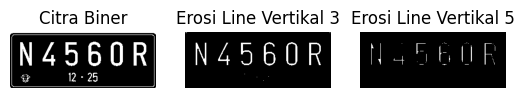

In [ ]:

# Membaca gambar
image_erosi_structur_element = cv2.imread('/content/drive/MyDrive/img/plat_nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Mengubah citra ke citra biner menggunakan thresholding
_, binary_image = cv2.threshold(image_erosi_structur_element, 125, 255, cv2.THRESH_BINARY)

# Fungsi untuk melakukan erosi dengan Structuring Element berbentuk Line Vertikal
def erosi_line_vertikal(image, k):
    m, n = image.shape

    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (1, k))
    constant = (k - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = image[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Melakukan erosi dengan Structuring Element berbentuk Line Vertikal 3
erosi_image_line_vertikal_3 = erosi_line_vertikal(binary_image, 3)

# Melakukan erosi dengan Structuring Element berbentuk Line Vertikal 5
erosi_image_line_vertikal_5 = erosi_line_vertikal(binary_image, 5)

# Menampilkan hasil erosi
plt.subplot(131), plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(132), plt.imshow(erosi_image_line_vertikal_3, cmap='gray')
plt.title('Erosi Line Vertikal 3')
plt.axis('off')

plt.subplot(133), plt.imshow(erosi_image_line_vertikal_5, cmap='gray')
plt.title('Erosi Line Vertikal 5')
plt.axis('off')

plt.show()


TOPHAT

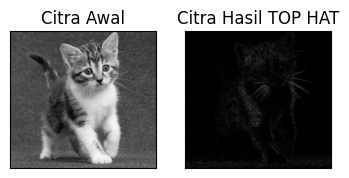

In [ ]:
cat = cv2.imread('/content/drive/MyDrive/img/cat.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)

# Tophat
filterSize =(3, 3)
kernel_tophat = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
tophat_img = cv2.morphologyEx(cat, cv2.MORPH_TOPHAT, kernel_tophat)

plt.subplot(131),plt.imshow(cat,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

BLACKHAT

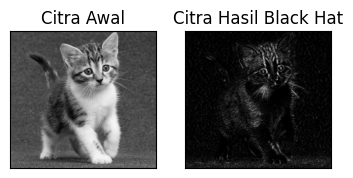

In [ ]:
# Black Hat
kernel_blackhat = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(cat, cv2.MORPH_BLACKHAT, kernel_blackhat)

plt.subplot(131),plt.imshow(cat,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

SKELETON

In [ ]:
# Library Sekeleton
from skimage import filters
from skimage.morphology import skeletonize
from skimage import io, color, morphology
from skimage.feature import canny

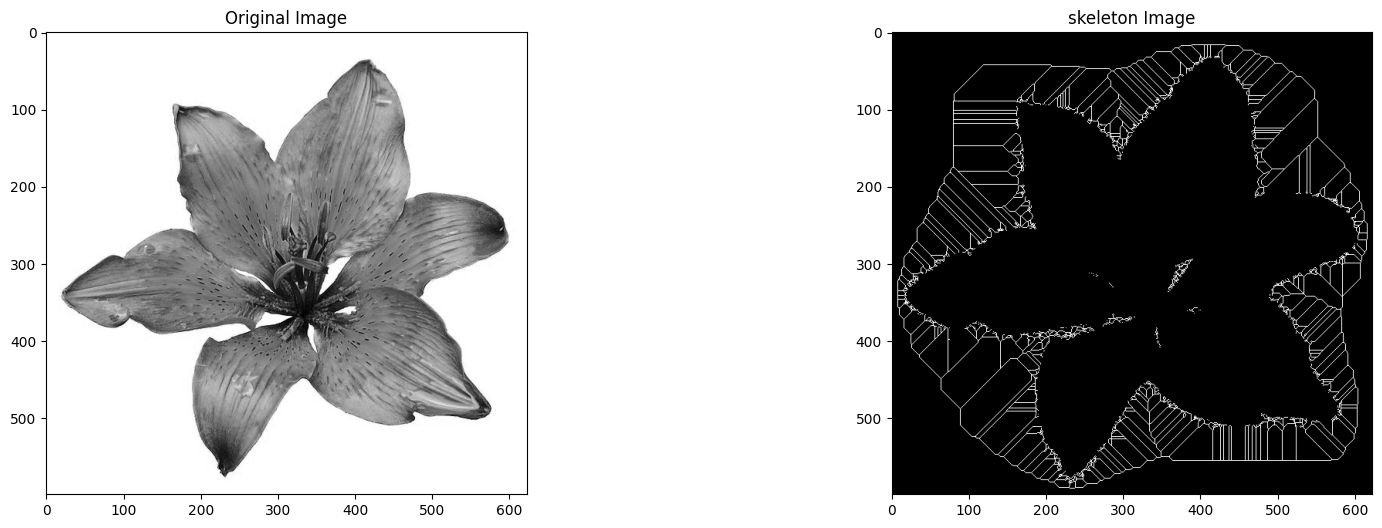

In [ ]:
flower = io.imread('/content/drive/MyDrive/img/lily.jpg')
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)
binary = flower > filters.threshold_triangle(flower)

# Benar(1) & Salah(0)
binary = binary.copy()
binary[binary == True] = 1
binary[binary == False] = 0

# Merubah ke Skeleton
skeleton = skeletonize(binary)


plt.figure(figsize=(20, 6))
plt.subplot(121),plt.imshow(flower,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image')

plt.show()

SKELETON INVERSE

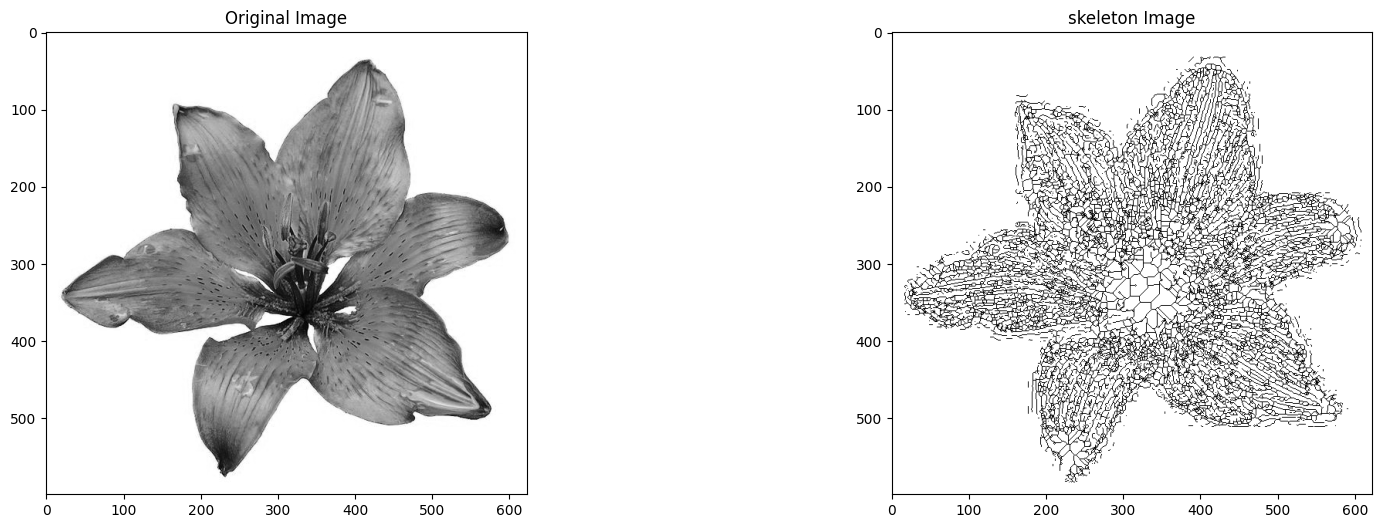

In [ ]:
flower_skeleton_inverse = io.imread('/content/drive/MyDrive/img/lily.jpg')[...,0]

# Untuk membenarkan nilai bit nya menjadi hitam maka menggunakan operator <
binary = flower_skeleton_inverse < filters.threshold_triangle(flower_skeleton_inverse)

# Merubah ke Skeleton
skeleton = skeletonize(binary)

plt.figure(figsize=(20, 6))
plt.subplot(121),plt.imshow(flower,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122),plt.imshow(~skeleton,cmap = 'gray')
plt.title('skeleton Image')

plt.show()

THICKENING

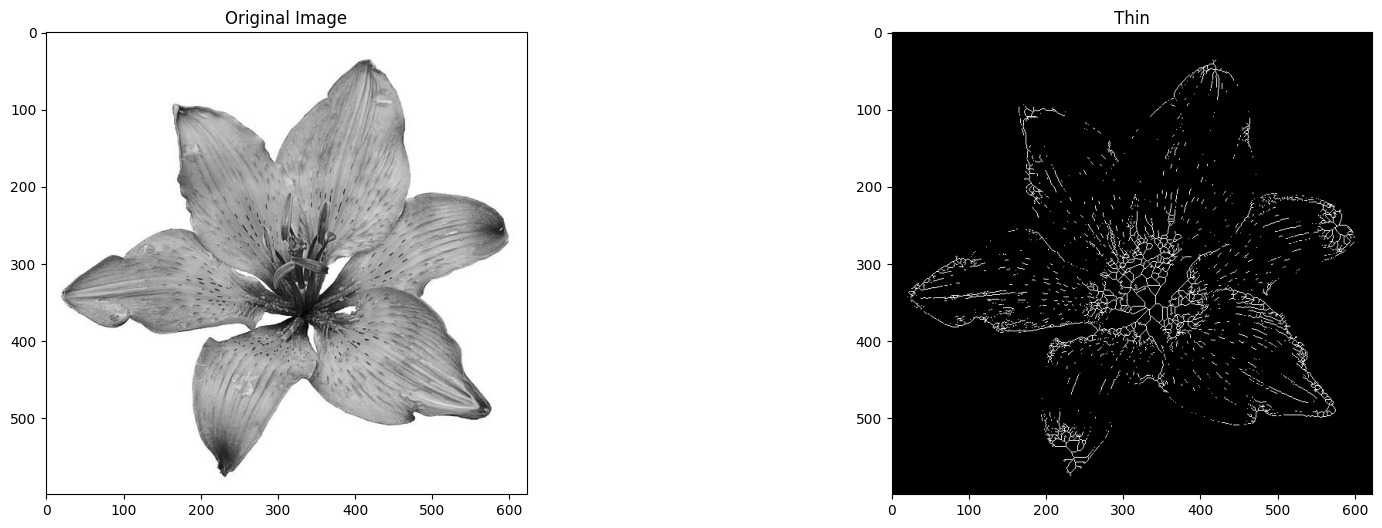

In [ ]:
from skimage import img_as_float

flower_thickening = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/img/lily.jpg')))

#Thickening
image_binary = flower_thickening < 0.5
out_thin = morphology.thin(image_binary)


plt.figure(figsize=(20, 6))
plt.subplot(121), plt.imshow(flower_thickening, cmap='gray')
plt.title('Original Image')

plt.subplot(122), plt.imshow(out_thin, cmap='gray')
plt.title('Thin')

plt.show()




## TUGAS PRAKTIKUM

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

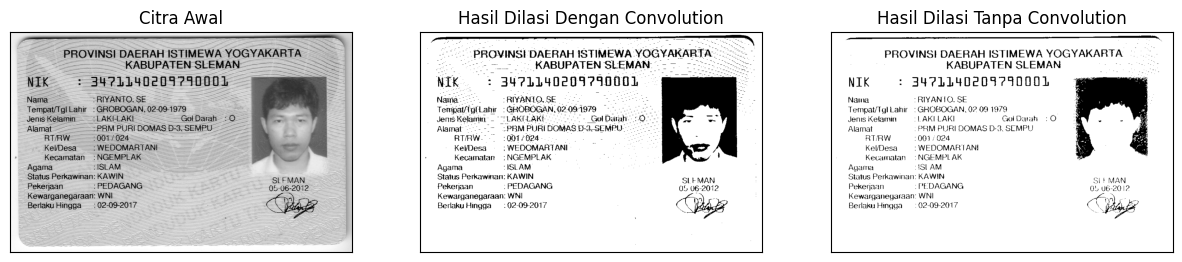

In [ ]:
# Dilasi
def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result


def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

img = cv2.imread('/content/drive/MyDrive/img/KTP/ktp.png')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

# cv2_imshow
result = conv2d(img, kernel_lsed,1)
brightness = Brightness(result, -35)

input = cv2.cvtColor(brightness, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)


input2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY)
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Hasil Dilasi Dengan Convolution')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Hasil Dilasi Tanpa Convolution')
plt.xticks([]), plt.yticks([])
plt.show()


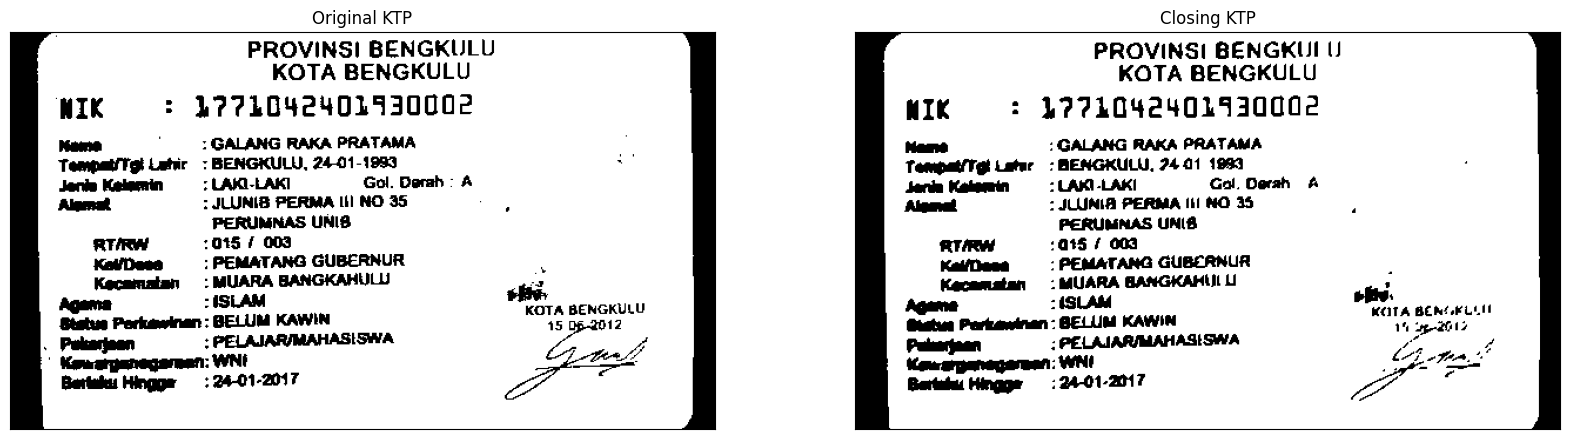

In [ ]:
# CLOSING

def convert_to_binary(image):
    # Konversi gambar ke dalam citra grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan fungsi thresholding dengan flag THRESH_OTSU
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

# Membaca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/img/KTP/ktp1.png')

# Ubah ke binary
ktp_image = convert_to_binary(ktp_image)

# Closing
kernel = np.array([[1, 1],
                              [1, 0]], dtype = np.uint8)
closs = cv2.morphologyEx(ktp_image,cv2.MORPH_CLOSE, kernel)

# Menampilkan citra KTP
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(X=ktp_image, cmap = 'gray')
plt.title('Original KTP'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(X=closs,cmap = 'gray')
plt.title('Closing KTP'), plt.xticks([]), plt.yticks([])


plt.show()

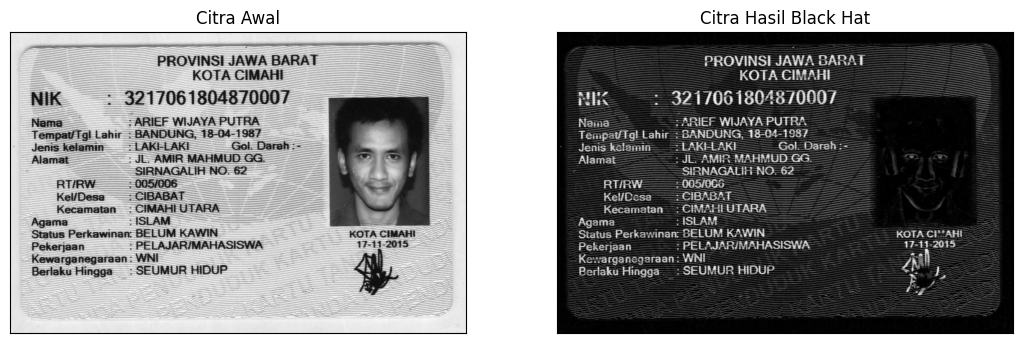

In [ ]:
# BLACK HAT
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
img = cv2.imread('/content/drive/MyDrive/img/KTP/ktp2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

plt.figure(figsize=(20, 6))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

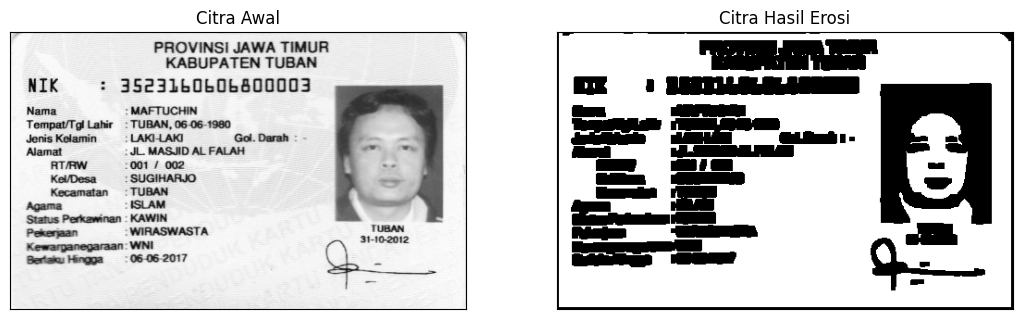

In [ ]:
# EROSI
def erosi_citra(F, k):
  height, width = F.shape

  structural_erosi = np.ones((k,k), dtype=np.uint8)
  constant = (k - 1) // 2

  image_copyS = np.zeros((height, width), dtype=np.uint8)
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structural_erosi
      image_copyS[i,j] = np.min(product)

  return image_copyS

image1 = cv2.imread('/content/drive/MyDrive/img/KTP/ktp3.png', 0)

k = 5
ret, thresh = cv2.threshold(image1, 175, 225, cv2.THRESH_BINARY)
image_copyS = erosi_citra(thresh, k)


plt.figure(figsize=(20, 6))
plt.subplot(131), plt.imshow(image1, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copyS, cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()



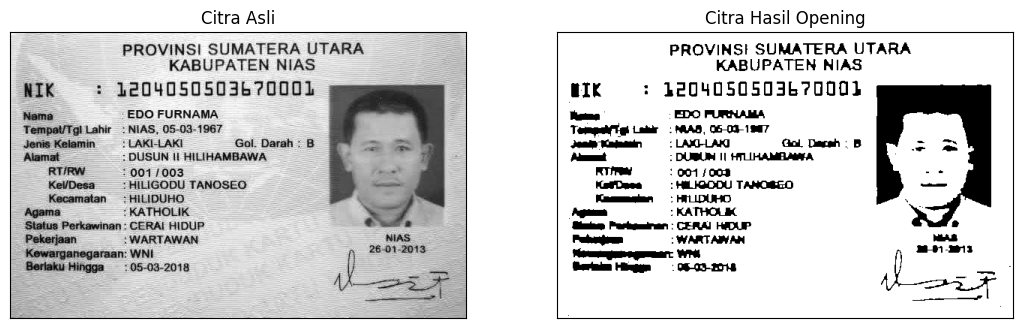

In [ ]:
# OPENING
image_path = '/content/drive/MyDrive/img/KTP/ktp5.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

ret, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
image_opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

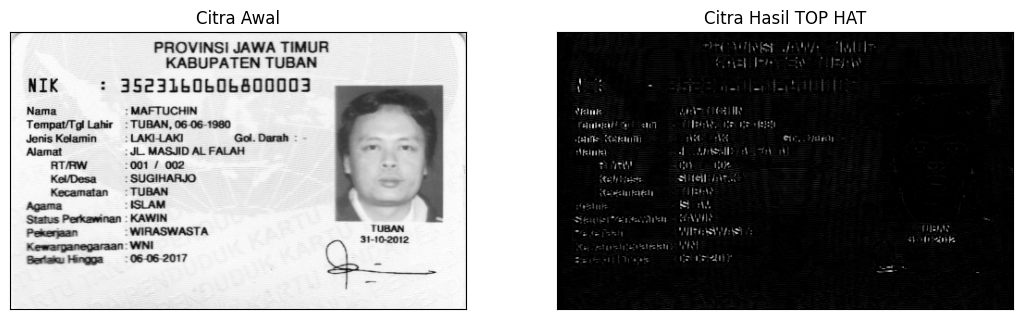

In [ ]:
# TOP HAT
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/img/KTP/ktp4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()
